In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pumpkins = pd.read_csv("../data/US-pumpkins.csv")

# FILTERING ROWS THAT DO NOT CONTAIN BUSHEL
pumpkins = pumpkins[pumpkins["Package"].str.contains("bushel", case=True, regex=True)]

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [13]:
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1742,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [ ]:
# TOTAL MISSING VALUES 
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [ ]:
# DROP OTHER COLUMNS KEEP SPECIFIED COLUMNS
# .loc(rows, columns) -> (: KEEP ALL ROWS, KEEP COLUMNS)
columns_to_select = ["Package","Low Price", "High Price", "Date"]
pumpkins = pumpkins.loc[:,columns_to_select]

In [ ]:
# AVERAGE PRICE 
price = (pumpkins["Low Price"] + pumpkins["High Price"]) / 2
# EXTRACT MONTH
month = pd.DatetimeIndex(pumpkins["Date"]).month
print(price)

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64


In [ ]:
# BUILD NEW DATAFRAME WITH DATA
new_pumpkins = pd.DataFrame(
    {"Month": month, 
      "Package": pumpkins["Package"],
      "Low Price": pumpkins["Low Price"],
      "High Price": pumpkins["High Price"],
      "Price": price
      }
)

new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


In [ ]:
# UPDATE ROWS TO REFLECT BUSHEL SOLD. 
new_pumpkins.loc[new_pumpkins["Package"].str.contains("1 1/9"), "Price"] = price / (
    1 + 1 / 9
)

new_pumpkins.loc[new_pumpkins["Package"].str.contains("1/2"), "Price"] = price / (1 / 2)

In [19]:
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00


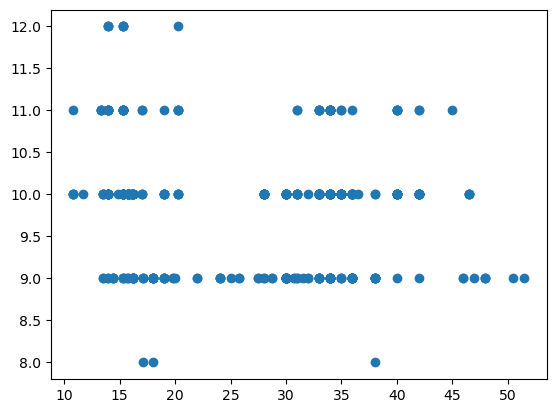

In [21]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price,month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

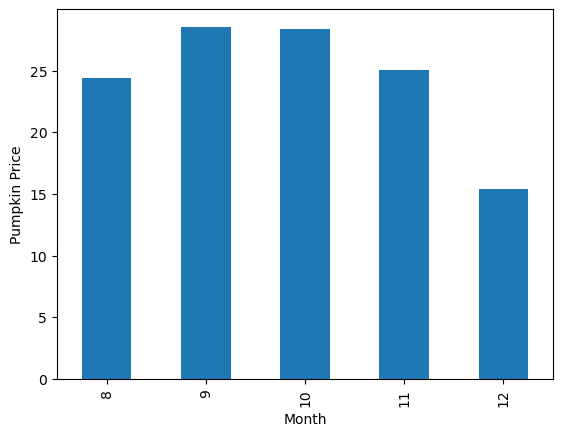

In [ ]:

new_pumpkins.groupby(["Month"])["Price"].mean().plot(kind="bar")
plt.ylabel("Pumpkin Price")

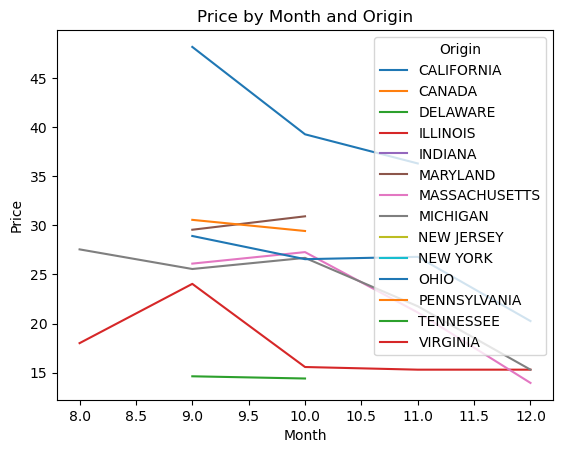

In [ ]:
new_pumpkins = pd.DataFrame(
    {"Origin": pumpkins["Origin"], 
     "Month" : month,
      "Package": pumpkins["Package"],
      "Low Price": pumpkins["Low Price"],
      "High Price": pumpkins["High Price"],
      "Price": price
      }
)


# Grouping the data by Origin and Month
grouped = new_pumpkins.groupby(['Origin', 'Month'])["Price"].mean().reset_index()

# Plotting
fig, ax = plt.subplots()

for origin in grouped['Origin'].unique():
    subset = grouped[grouped['Origin'] == origin]
    ax.plot(subset['Month'], subset['Price'], label=origin)

ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title('Price by Month and Origin')
ax.legend(title='Origin')

plt.show()